In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.utils import shuffle
import plotly.graph_objects as go
import csv
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import string
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/warwick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/warwick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import re
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from gensim.models import Word2Vec
import wordcloud
from PIL import Image

In [3]:
filename = "USvideos.csv"
raw_data = pd.read_csv(filename)

In [4]:
n_data = raw_data.shape[0]
feature_list = raw_data.columns
print("the number of video data is:", n_data)
print("features are:", feature_list)
print("the number of features are:", len(feature_list))

the number of video data is: 40949
features are: Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
the number of features are: 16


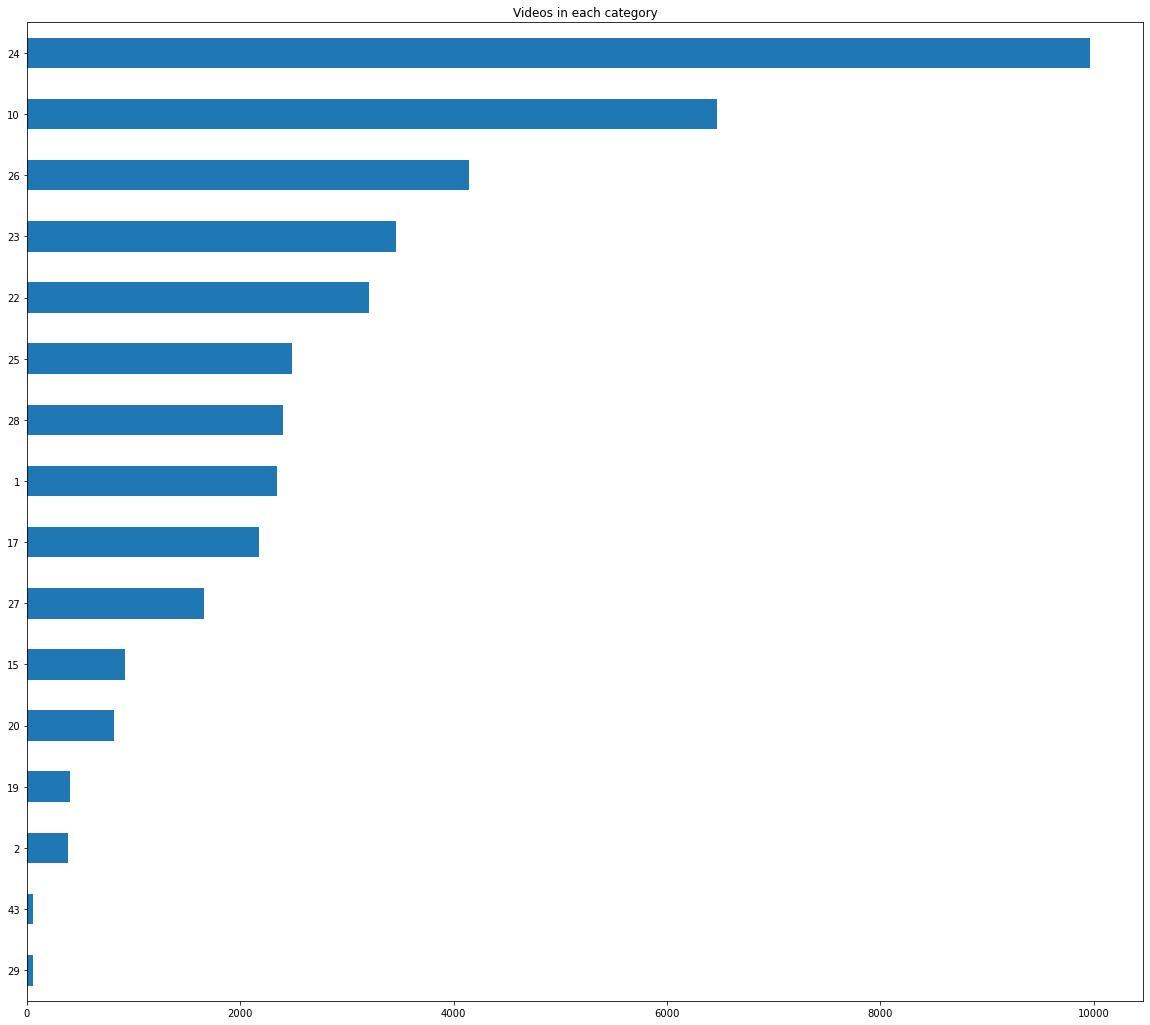

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

In [5]:
raw_data['category_id'].value_counts().sort_values().plot(kind = 'barh', figsize=(20,18))
plt.title("Videos in each category")
plt.show()
raw_data.category_id.value_counts()

In [6]:
raw_data.groupby('category_id')["likes"].describe(percentiles = [0.25, 0.5, 0.75])

,count,mean,std,min,25%,50%,75%,max
category_id,,,,,,,,
1,2345.0,70787.836247,118214.539441,0.0,4511.00,25176.0,72620.00,922355.0
2,384.0,11056.395833,14038.204617,0.0,713.50,5916.0,17728.00,97030.0
10,6472.0,218918.199011,484739.236757,0.0,14322.50,62280.5,195411.25,5613827.0
15,920.0,21055.110870,25425.365461,6.0,5433.00,14431.5,26694.25,178243.0
17,2174.0,45363.942502,126488.307224,0.0,2027.25,5700.5,18802.00,1121217.0
19,402.0,12030.462687,10098.717109,3.0,3155.25,11634.0,15685.25,42447.0
20,817.0,84502.183599,86170.886319,2.0,15676.00,51057.0,125244.00,444203.0
22,3210.0,58135.825234,132265.076831,0.0,6255.00,19438.0,58321.00,2032463.0
23,3457.0,62582.223315,90431.975588,6.0,11524.00,30214.0,72887.00,865679.0


In [7]:
raw_data.groupby('category_id')["dislikes"].describe(percentiles = [0.25, 0.5, 0.75])

,count,mean,std,min,25%,50%,75%,max
category_id,,,,,,,,
1,2345.0,2590.681450,3980.299514,0.0,183.00,1022.0,3218.00,38082.0
2,384.0,632.838542,1317.419719,0.0,73.00,279.0,796.50,12290.0
10,6472.0,7907.757726,23617.112304,0.0,346.00,1243.5,4921.00,343541.0
15,920.0,573.238043,778.528935,0.0,108.00,276.0,676.75,4899.0
17,2174.0,2361.339006,10008.928749,0.0,97.25,343.0,1224.75,176903.0
19,402.0,846.833333,1465.155786,0.0,122.25,351.0,791.50,9000.0
20,817.0,11241.696450,35459.368193,0.0,681.00,1956.0,5600.00,212976.0
22,3210.0,3173.800935,12157.768183,0.0,165.00,555.5,1838.00,228426.0
23,3457.0,2091.521840,3400.655269,0.0,357.00,956.0,2291.00,29865.0


In [8]:
raw_data.groupby('category_id')["views"].describe(percentiles = [0.25, 0.5, 0.75])

,count,mean,std,min,25%,50%,75%,max
category_id,,,,,,,,
1,2345.0,3.106250e+06,5.576255e+06,943.0,302850.00,1274578.0,3227166.00,54863912.0
2,384.0,1.355965e+06,3.373464e+06,2860.0,104652.75,406278.0,1074284.25,25244097.0
10,6472.0,6.201003e+06,1.545988e+07,1591.0,382714.75,1434128.0,4947952.75,225211923.0
15,920.0,8.311435e+05,1.102091e+06,3393.0,185072.25,444501.5,941298.75,6187457.0
17,2174.0,2.025969e+06,4.017255e+06,658.0,194181.50,559352.0,1406208.50,29090799.0
19,402.0,8.546196e+05,1.918995e+06,789.0,221528.50,494825.5,985693.25,23932421.0
20,817.0,2.620831e+06,3.165318e+06,1237.0,530676.00,1494142.0,3202761.00,16935442.0
22,3210.0,1.531835e+06,3.459637e+06,884.0,202658.50,599139.0,1686941.50,56111957.0
23,3457.0,1.480308e+06,2.009899e+06,1807.0,351261.00,980236.0,1877801.00,29178096.0


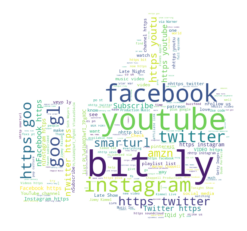

In [20]:
text = raw_data["description"]
text_mask = np.array(Image.open('upvote.png'))
text_list = " ".join(str(i) for i in text)
wc = wordcloud.WordCloud(background_color = "white",mask = text_mask).generate(text_list)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#try to implement K-mean clustering 

In [11]:
df = pd.read_csv(filename)

In [12]:
df.fillna(" ",inplace=True)
df=df.drop_duplicates()

#combine title, channel_title, description, tags 
df["Text_Feature"]=df.title+" "+df.tags+" "
for i in range(3):
    df["Text_Feature"]=df["Text_Feature"]+" "+df.description+" "+df.channel_title+" "

In [15]:
def text_preprocess(data):
    data=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", data)
    data=re.sub(r'\\n+'," ",data)
    data=data.replace("|"," ")
    data=re.sub(r'[?|!|\'|"|#|,|-|@|(|)]', "", data)
    data=data.replace(": "," ").replace("-"," ").replace(" :"," ")
    data=re.sub(r' +',' ',data).lower()
    return data

data=df['Text_Feature']
list_of_sent=[]
for sent in data.values:
    list_of_sent.append(sent.split())

w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [16]:
#convert a list of words into vectors
#take mean of all word vector in a sentence

def avgw2v(list_of_sent):
    sent_vectors = []; 
    for sent in list_of_sent:
        sent_vec = np.zeros(50)
        cnt_words =0; 
        for word in sent:
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors

sent_vect=avgw2v(list_of_sent)

40901
50


In [20]:
std = StandardScaler()
data_vect=std.fit_transform(sent_vect)

In [32]:
def k_means(data,cluster_range):
    models=[]
    loss=[]
    for k in cluster_range:
        kmeans=KMeans(n_clusters=k,init='k-means++').fit(data)
        models.append(kmeans)
        loss.append(kmeans.inertia_)
    plt.plot(cluster_range,loss)
    plt.xlabel('k-clusters')
    plt.ylabel('loss')
    plt.show()  
    return models


def cluster_analysis(train_data,k):
    for i in range(0,k):
        #Extract cleaned text column
        data=train_data[train_data['labels']==i]['Text_Feature'].values
        list_of_words=[];
        for sent in data:
            for word in sent.split():
                list_of_words.append(word)
        final_text=" ".join(list_of_words)
        wc = wordcloud.WordCloud(collocations=True).generate(final_text)
        plt.figure()
        title="\nCluster : "+str(i+1)+"\n Number of Reviews"+str(len(data))
        plt.title(title)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()

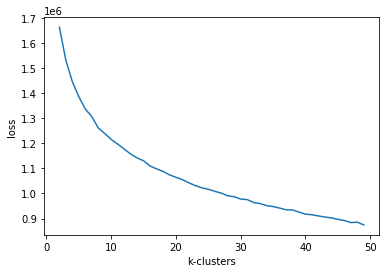

In [24]:
model_list=k_means(data_vect,range(2,50))

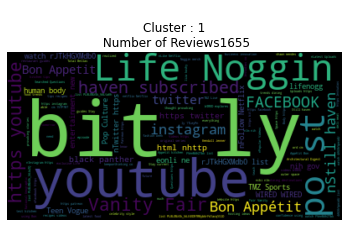

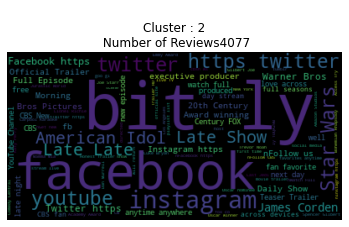

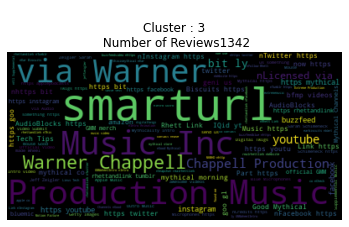

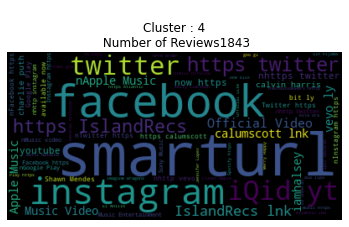

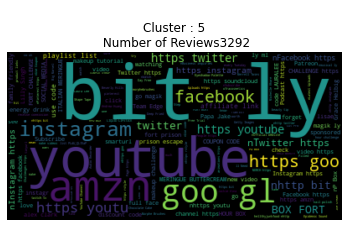

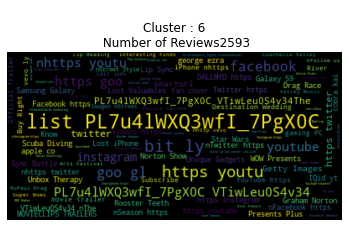

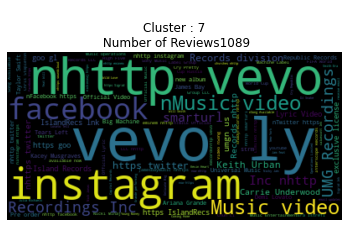

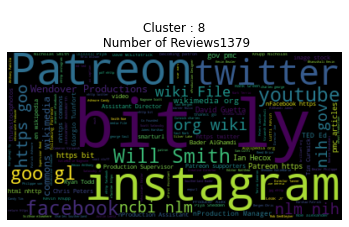

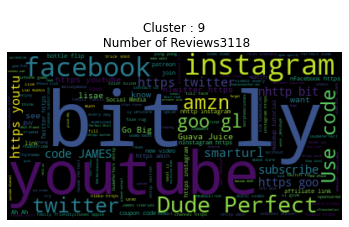

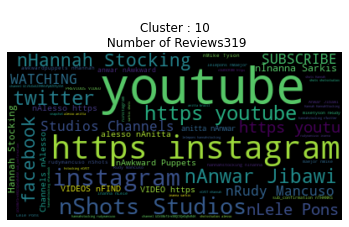

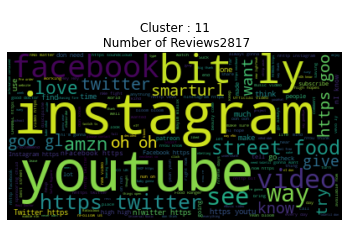

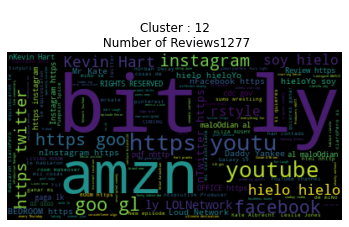

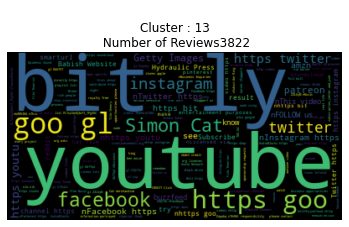

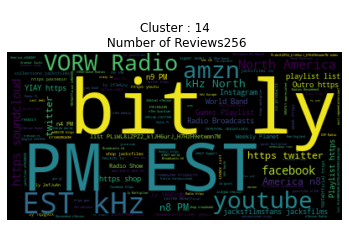

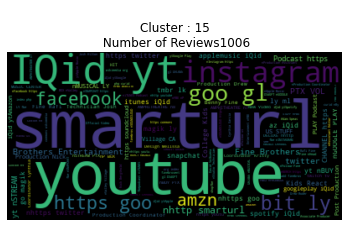

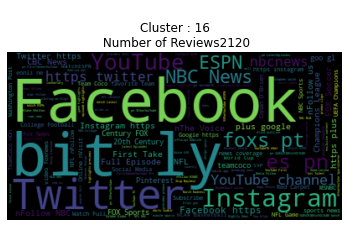

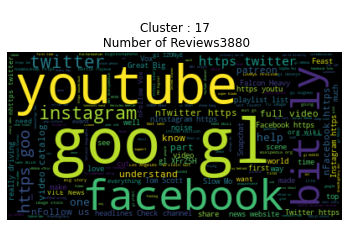

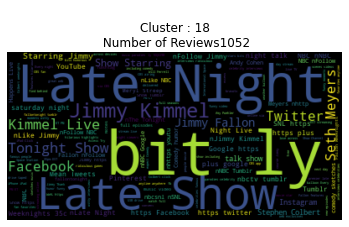

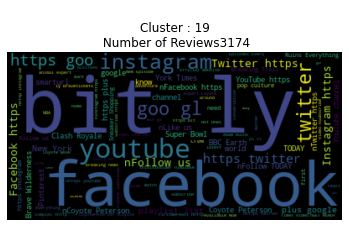

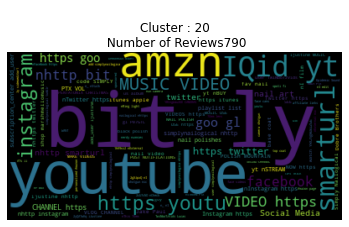

In [34]:
df['labels']=model_list[18].labels_
cluster_analysis(df,20)